<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer




<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading and Exploring the dataset
</h1>

### Steps to Analyze `loans.csv` Data Using Pandas

1. **Import pandas and read the CSV file**
   - Load the `loans.csv` file into a DataFrame.

2. **Remove the `Customer ID` column**
   - Drop the `Customer ID` column from the DataFrame.

3. **Print the head of the data**
   - Display the first few rows to review the data structure.

4. **Filter rows with `Current Loan Amount` < 99999999**
   - Exclude rows where the `Current Loan Amount` is too large.

5. **Remove rows with `Annual Income` as NaN**
   - Drop rows where the `Annual Income` column contains missing values.

6. **Extra Task: Impute missing `Annual Income` values**
   - Replace NaN values in `Annual Income` with the column's mean instead of removing them.


In [96]:
# Load the data 
df= pd.read_csv('Datasets\loans.csv')
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [98]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [99]:
# Removing the customer id  from the dataset
df = df.drop('Customer ID', axis=1)

In [100]:
# Loading the shape of dataset  
print(df.shape)

(100514, 18)


In [101]:
# Since the data is too large, I will remove rows where "Current Loan Amount" is more than 99999999

df = df[df["Current Loan Amount"] < 99999999]

df.shape

(88516, 18)

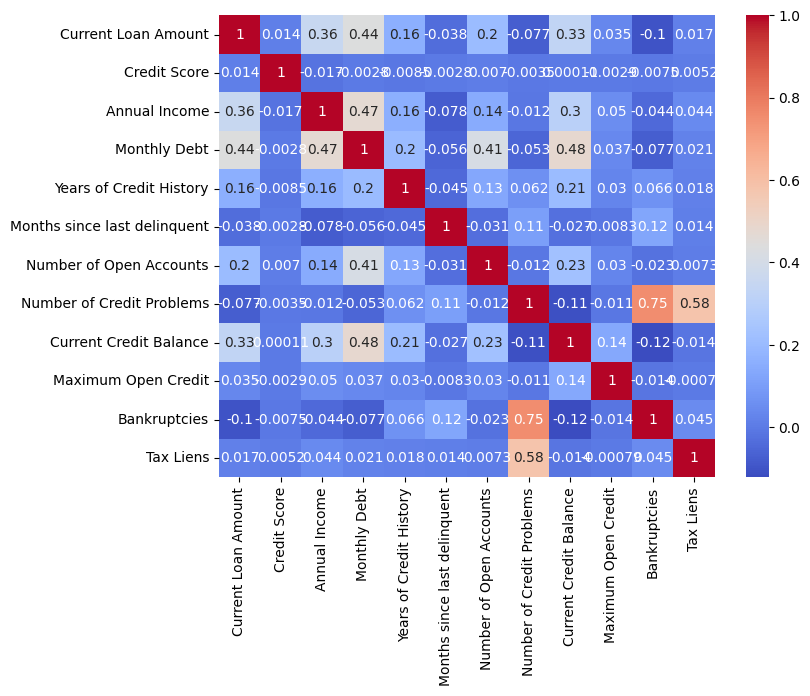

In [102]:
correlation = df.corr(numeric_only=True)
 
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [103]:
# Checking the NaN values in the dataset
df.isnull().sum()


Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3794
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    46788
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      177
Tax Liens                           9
dtype: int64

6. **Extra Task: Impute missing `Annual Income` values**
   - Replace NaN values in `Annual Income` with the column's mean instead of removing them.


In [104]:
df.head(1)

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


In [105]:
# There are many columns that have NaN values, let's handle them, but there is a problem "Month since last delinquent" column has a lot many miss values
# let's calculate the percentage of NaN values in the this column
prcent_miss_value = df['Months since last delinquent'].isnull().sum() / df.shape[0] * 100
prcent_miss_value 

np.float64(52.85824031813458)

In [106]:
# Since the percentage of NaN values in the "Months since last delinquent" column is 52.85 %, I think it is better to remove this column from the dataset
df =df.drop('Months since last delinquent', axis=1)


In [107]:
#Before  analyzing the "Years in current job" column, I need to convert the column to numerical values 
df["Years in current job"] = df["Years in current job"].str.extract('(\d+)').astype(float)


In [108]:
"""
Before imputing, I analyzed the " Annual Income", it has positive skewed distribution and right long tail, and high kurtosis. Standard deviation is also large
Mean is  higher than median, it shows that few people have high income, and most of the people have low income.

It would be better to impute the missing values with median, because mean is affected by the rich people.
On the other hand, median is a bit effected by the rich people, and it shows the normal distribution of the data
 
I will implement the imputation with mean, it is mentioned in my assignment.

"Credit Score"  has also positive skewed distribution it shows few people have  high credit score  I think because of financial stability.

"Maximum Open Credit" has also positive skewed distribution, it shows that few people have high credit limit, and most of the people have low credit limit.

"Bankruptcies" has positive skewed distribution too and a bit higher kurtosis. 
"Tax Liens" has positive skewed distribution and  high kurtosis.
# "Years in current job" has near to zero skewness so it means that the data is normally distributed and it has negative kurtosis which means that distribution is flat

"""

'\nBefore imputing, I analyzed the " Annual Income", it has positive skewed distribution and right long tail, and high kurtosis. Standard deviation is also large\nMean is  higher than median, it shows that few people have high income, and most of the people have low income.\n\nIt would be better to impute the missing values with median, because mean is affected by the rich people.\nOn the other hand, median is a bit effected by the rich people, and it shows the normal distribution of the data\n \nI will implement the imputation with mean, it is mentioned in my assignment.\n\n"Credit Score"  has also positive skewed distribution it shows few people have  high credit score  I think because of financial stability.\n\n"Maximum Open Credit" has also positive skewed distribution, it shows that few people have high credit limit, and most of the people have low credit limit.\n\n"Bankruptcies" has positive skewed distribution too and a bit higher kurtosis. \n"Tax Liens" has positive skewed dist

In [109]:
#Let's handle the NaN values in the dataset

df["Credit Score"] = df["Credit Score"].fillna(round(df["Credit Score"].mean()))
df["Annual Income"] = df["Annual Income"].fillna(round(df["Annual Income"].mean()))     
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(round(df["Maximum Open Credit"].mean()))
df["Bankruptcies"] = df["Bankruptcies"].fillna(round(df["Bankruptcies"].mean()))
df["Years in current job"] = df["Years in current job"].fillna(round(df["Years in current job"].mean()))

In [110]:
# For the "Tax Liens" column, I will fill the NaN values with mode imputation 
# because it has small number of unique values and it has strong positive skewness and the zero value is the most frequent value
# Even I can use median because it median gives he same value or I could fill it with zero

df["Tax Liens"] = df["Tax Liens"].fillna(df["Tax Liens"].mode()[0])

In [111]:
df.head(1)

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0


In [112]:
df.isnull().sum()

Loan ID                      0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [113]:
# Getting the average of the "Current loan amount"
df["Current Loan Amount"].mean()


np.float64(312313.59788060916)

In [114]:
# Getting the hightest and lowest "Annual Income"
print(df["Annual Income"].max())
print(df["Annual Income"].min())

165557393.0
76627.0


In [115]:
# Getting the home Ownership value of the Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d
df[df["Loan ID"] == "bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d"]["Home Ownership"]


491    Own Home
Name: Home Ownership, dtype: object

In [116]:
home_ownership = df[df["Loan ID"] == "bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d"]["Home Ownership"].iloc[0]
home_ownership


'Own Home'

In [117]:
#  Create a new field into your dataset called Actual Annual Income.
# I need to use this formula fro the calculation of the "Actual Annual Income": Annual Income – 12 * Monthly Debt
df["Actual Annual Income"] = df["Annual Income"] - 12 * df["Monthly Debt"]


In [118]:
# Getting the "Actual Annual Income" of the Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d
df[df["Loan ID"] == "bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d"]["Actual Annual Income"]

491    1262631.32
Name: Actual Annual Income, dtype: float64

In [119]:
# Getting the Loan ID of the loan with the smallest Actual Annual Income
df[df["Actual Annual Income"] == df["Actual Annual Income"].min()]["Loan ID"]

11648    0a84b8ab-ed2f-474f-a3a9-8bf5bb90c31a
Name: Loan ID, dtype: object

In [120]:
# Finding: How many loans are "Long term"?

long_term = df[df["Term"] == "Long Term"].shape[0]
long_term

25475

In [121]:
# Finding: How many loaners have more than 1 bankruptcy?
bankruptcy = df[df["Bankruptcies"] > 1].shape[0]
bankruptcy

476

In [122]:
# Finding: How many Short Term loans are for Home Improvements?
home_imp = df[(df["Term"] == "Short Term") & (df["Purpose"] == "Home Improvements")].shape[0]
home_imp


3490

In [123]:
# Finding: How many unique loan purposes are there?
unique_purp = df["Purpose"].nunique()
unique_purp


16

In [124]:
# Finding: What are the 3 most common loan purposes?
common_purp = df["Purpose"].value_counts().head(3)
common_purp

Purpose
Debt Consolidation    69506
other                  5409
Home Improvements      5124
Name: count, dtype: int64

Finding  correlation between Annual Income and Number of
Open Accounts or  correlation between Number of
Credit Problems and Bankruptcies?

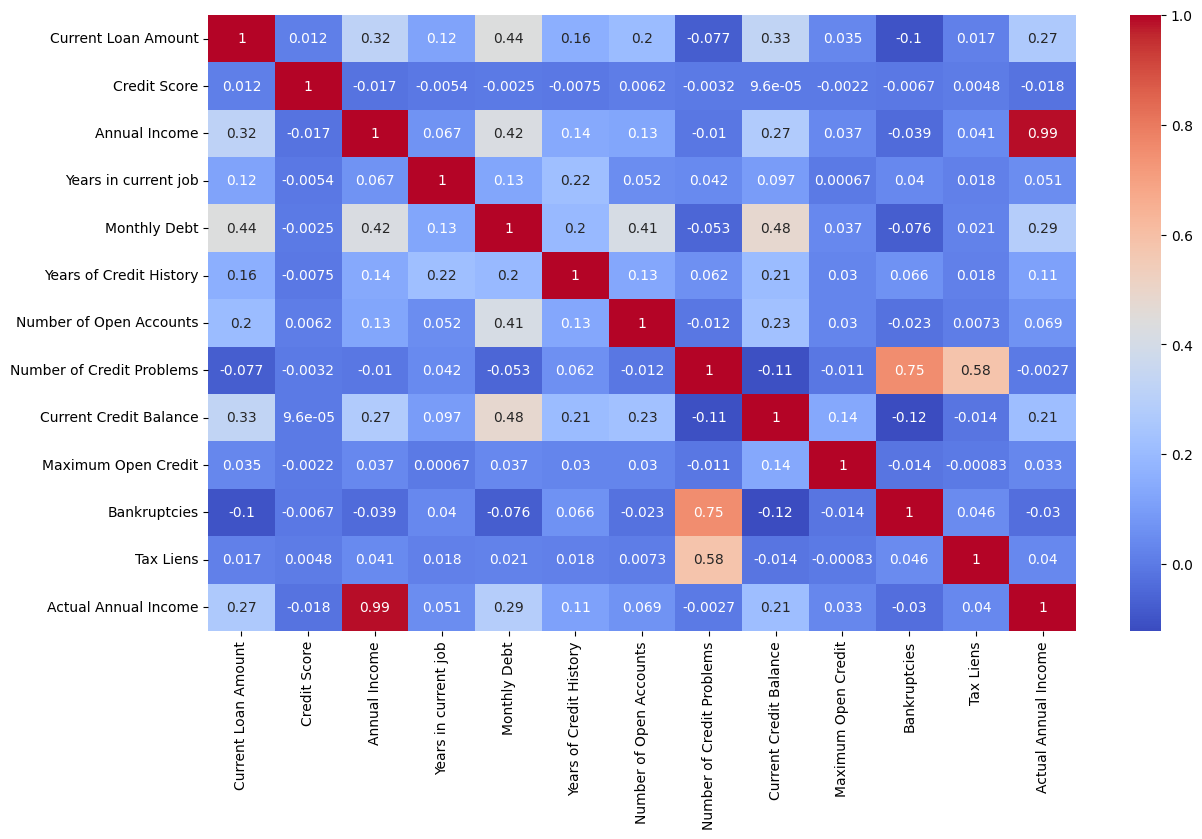

In [125]:
# Getting the correlation only numerical columns
correlation = df.corr(numeric_only=True)

# visualizing the correlation
plt.figure(figsize=(14,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


## <span style="color: #20C997;">Personal Analysis</span>
Between annual income and numbers of open accounts is weak positive correlation which means that people with high income are no very interested in opening many accounts.
But between credit problem and bankruptcies is strong positive correlation which means that people with credit problems (miss payments) are more probable to go bankrupt.
